<a href="https://www.kaggle.com/code/dsptlp/polar-examples?scriptVersionId=162802276" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install openml polar > log.txt

In [2]:
import pandas as pd
import openml
from openml.datasets import get_dataset
import polar as pl

/opt/conda/lib/python3.10/site-packages/polar/polar.py:275: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_local = df_local.replace({Label_column: mapping},inplace=False)
/opt/conda/lib/python3.10/site-packages/polar/polar.py:275: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_local = df_local.replace({Label_column: mapping},inplace=False)


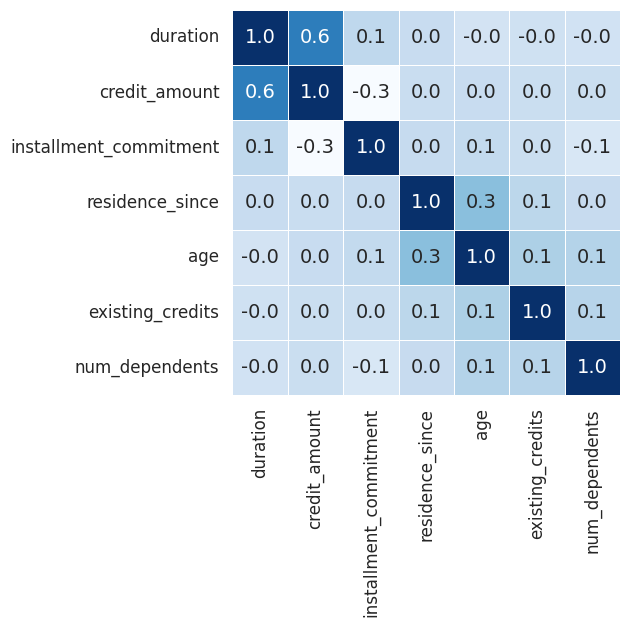

In [3]:
dataset = openml.datasets.get_dataset(31,download_data=True, download_qualities=True,download_features_meta_data=True)
X, y, categorical_indicator, attribute_names = \
dataset.get_data(target=dataset.default_target_attribute,dataset_format='dataframe')

openml_df = pd.DataFrame(X)
openml_df['target'] = y

data_df = pl.analyze_correlation(openml_df,'target')
pl.get_heatmap(data_df,'correlation_heat_map.png',1.1,14,'0.1f',0,100,5,5)

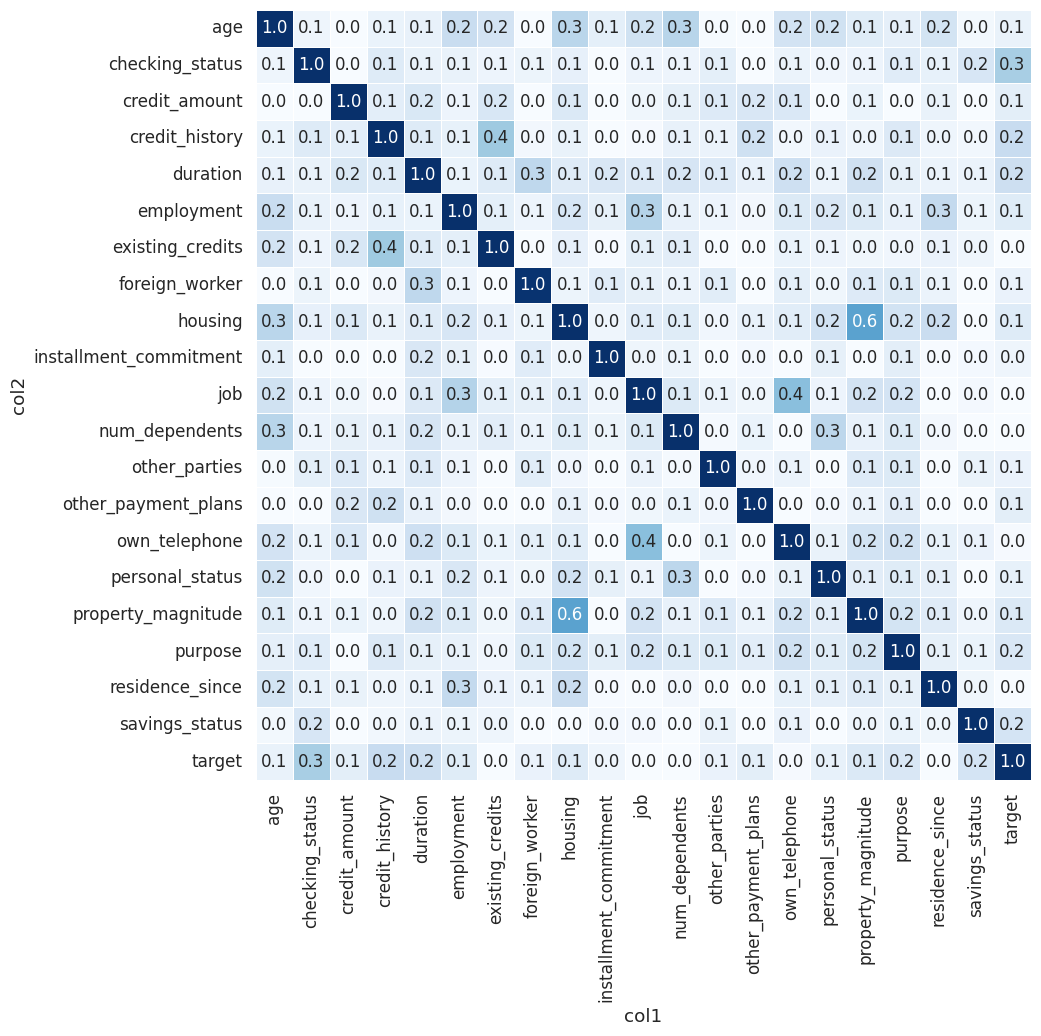

In [4]:
data_df = pl.analyze_association(openml_df,'target',verbose=0)
pl.get_heatmap(data_df,'association_heat_map.png',1.1,12,'0.1f',0,100,10,10)

using RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


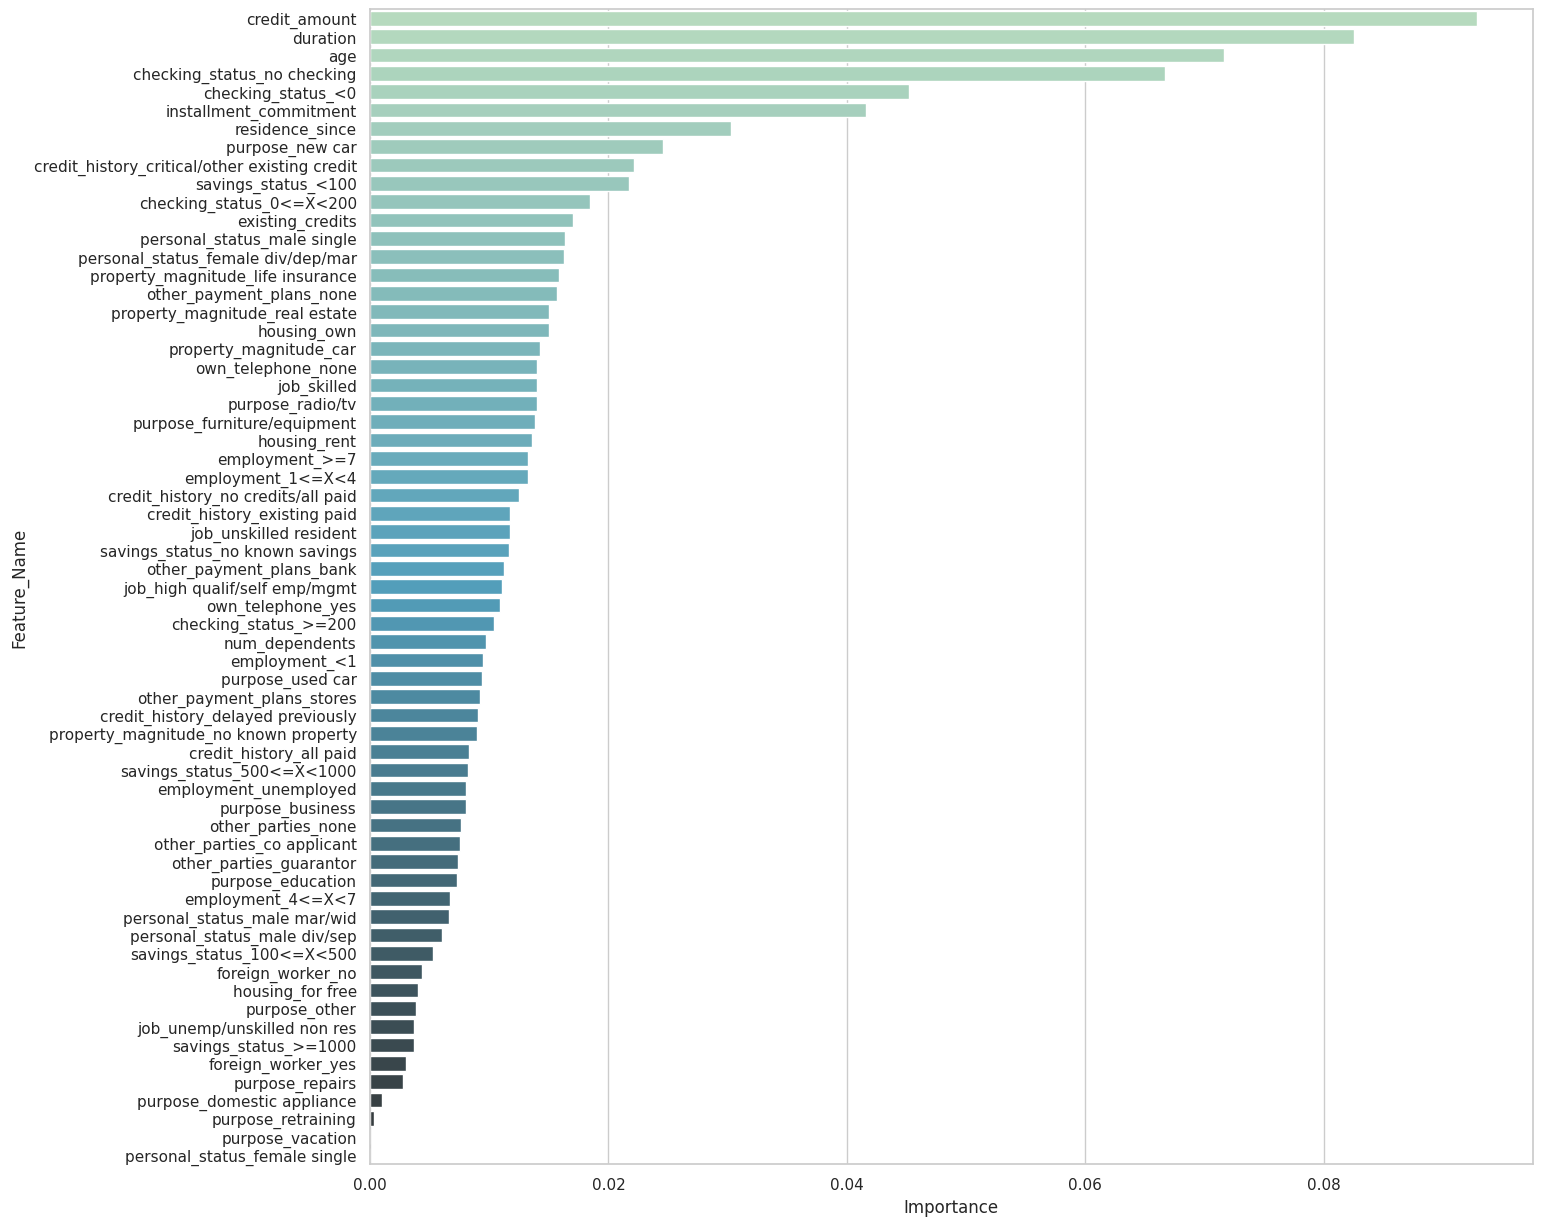

In [5]:
data_df = pl.get_important_features(openml_df,'target')
pl.get_bar(data_df,'important_features.png','Importance','Feature_Name')